Chat GPT links:
session 1: https://chatgpt.com/share/672cedae-8c58-8001-8ae4-94e16fbb6212
session 2: https://chatgpt.com/share/672d81b2-1894-8001-93d9-7a829814ca38

# Question 1
1. Explain the theoretical **Simple Linear Regression model** in your own words by describing its **components (of predictor and outcome variables, slope and intercept coefficients, and an error term)** and how they **combine to form a sample from normal distribution**;
2. Then, create python code explicitly demonstrating your explanation using **numpy** and **scipy.stats**

The *theoretical simple linear regression model* is a measure of the correlation between the dependent ($y_i$) and independent ($x_i$) variables. The slr model is expressed as $y_i$ and calculated with the $x_i$ (independent variable), $\beta_0$ (x intercept), $\beta_1$ (slope coeffecient) and $\varepsilon_i$ (error term). The formula for *SLR* is as follows:

$$
y_i = \beta_0 + \beta_1 x_i + \varepsilon_i
$$

It will give you a general picture of what the data will look like for a given x value. It is not a formula to give the exact value of the data set at the give x coordinate, it is only a prediction. the slr model can be considered an approximation ("educated guess") of the value in normal distribution, taking into account the error term, to account for randomness in variation.  

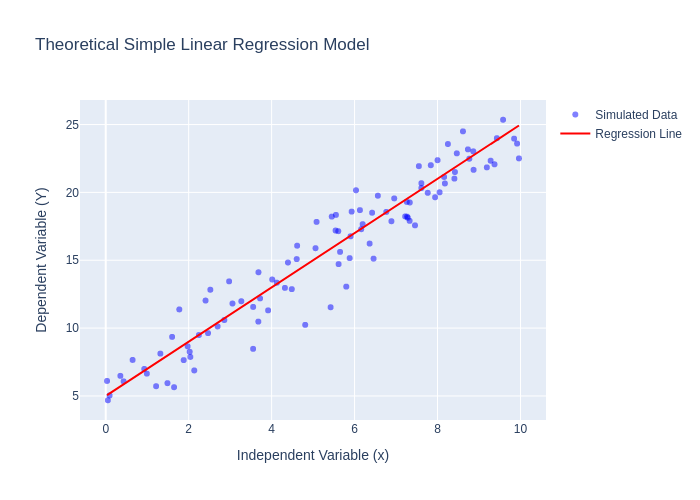

Theoretical expected value of Y for x=5: 15.00


In [12]:
# Code using nupmy and scipy.stats
import numpy as np
import plotly.graph_objects as go
from scipy import stats

# Step 1: Define theoretical parameters for the SLR model
n = 100  # Number of data points
beta_0 = 5  # Intercept (y-intercept)
beta_1 = 2  # Slope (gradient)
sigma = 1.5  # Standard deviation of the error term

# Step 2: Generate independent variable x using a uniform distribution
x = np.random.uniform(0, 10, n)

# Step 3: Calculate the predicted values (mean of the normal distribution)
y_pred = beta_0 + beta_1 * x  # Linear relationship

# Step 4: Generate errors (noise) from a normal distribution using scipy.stats
errors = stats.norm.rvs(loc=0, scale=sigma, size=n)  # loc is mean, scale is std dev

# Step 5: Calculate the dependent variable Y as the sum of predicted values and errors
Y = y_pred + errors

# Step 6: Create a Plotly figure
fig = go.Figure()

# Add scatter plot for the simulated data points
fig.add_trace(go.Scatter(x=x, y=Y, mode='markers', name='Simulated Data', marker=dict(color='blue', opacity=0.5)))

# Add the regression line based on the theoretical model
fig.add_trace(go.Scatter(x=x, y=y_pred, mode='lines', name='Regression Line', line=dict(color='red', width=2)))

# Update layout
fig.update_layout(title='Theoretical Simple Linear Regression Model',
                  xaxis_title='Independent Variable (x)',
                  yaxis_title='Dependent Variable (Y)',
                  showlegend=True)
# Show the plot
fig.show(renderer='png')

# Step 7: Print the theoretical expected value at x = 5
expected_value_at_x5 = beta_0 + beta_1 * 5
print(f"Theoretical expected value of Y for x=5: {expected_value_at_x5:.2f}")

# Question 2
1. Use a dataset simulated from your theoretical Simple Linear Regression model to demonstrate how to create and visualize a fitted Simple Linear Regression model using pandas and import statsmodels.formula.api as smf

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     1441.
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           2.04e-60
Time:                        23:24:38   Log-Likelihood:                -173.90
No. Observations:                 100   AIC:                             351.8
Df Residuals:                      98   BIC:                             357.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.2865      0.268     19.757      0.0

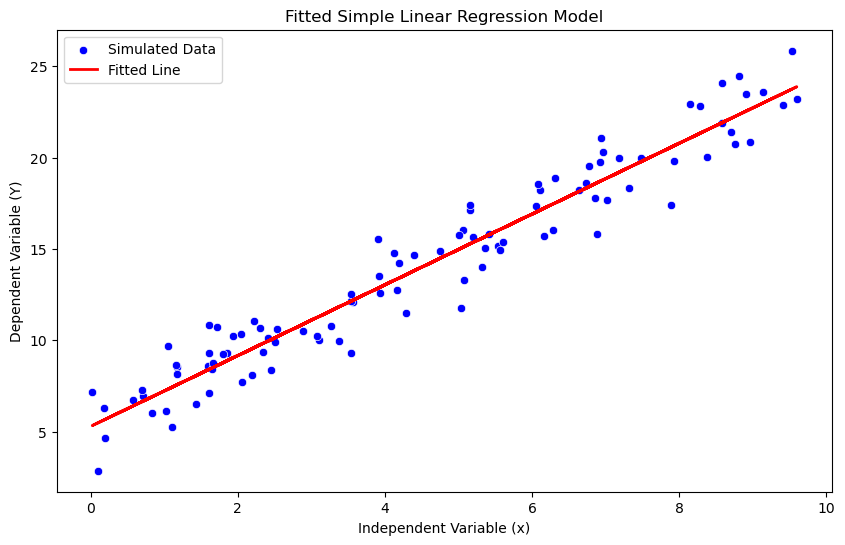

In [18]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Define theoretical parameters for the SLR model as the same as Q1
n = 100  # Number of data points
beta_0 = 5  # Intercept (y-intercept)
beta_1 = 2  # Slope (gradient)
sigma = 1.5  # Standard deviation of the error term

# Step 2: Generate independent variable x using a uniform distribution
x = np.random.uniform(0, 10, n)

# Step 3: Calculate the predicted values (mean of the normal distribution)
y_pred = beta_0 + beta_1 * x  # Linear relationship

# Step 4: Generate errors (noise) from a normal distribution
errors = np.random.normal(0, sigma, n)  # Normal distribution for errors

# Step 5: Calculate the dependent variable Y as the sum of predicted values and errors
Y = y_pred + errors

# Step 6: Create a DataFrame to hold the data
data = pd.DataFrame({'x': x, 'Y': Y})

# Step 7: Fit the Simple Linear Regression model using statsmodels
model = smf.ols('Y ~ x', data=data).fit()

# Step 8: Print the summary of the regression model
print(model.summary())

# Step 9: Create a scatter plot and add the fitted line
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='x', y='Y', color='blue', label='Simulated Data')
plt.plot(data['x'], model.fittedvalues, color='red', linewidth=2, label='Fitted Line')
plt.title('Fitted Simple Linear Regression Model')
plt.xlabel('Independent Variable (x)')
plt.ylabel('Dependent Variable (Y)')
plt.legend()

# Save the plot as a PNG file
plt.savefig('fitted_simple_linear_regression_model.png', dpi=300)

# Show the plot
plt.show()


In [3]:
# Code from Q3- commenting below

import statsmodels.formula.api as smf  # what is this library for?
# this library (statsmodels) is statistical modeling 
import plotly.express as px  # this is a ploting library

# what are the following two steps doing?
model_data_specification = smf.ols("Y~x", data=df) # specifies that i want to use the ols data model
fitted_model = model_data_specification.fit() # actually fits the data to the model, calculates the line of best fit by using slr to estimate

# what do each of the following provide?
fitted_model.summary()  
# summary of the statistics of the results from the slr models, pretty much just numbers based off of calculations from the slr model
fitted_model.summary().tables[1]  # extracts and displays the results from the second column of the summary output
fitted_model.params  # returns the pandas series with the estimated coefficents for regression (slope and intercepts)
fitted_model.params.values  # takes the actual numerical values from fitted_model.params.values
fitted_model.rsquared  # square of the correlation coeffecient 

#adds a legend and labels
df['Data'] = 'Data' # hack to add data to legend 
fig = px.scatter(df, x='x',  y='Y', color='Data', 
                 trendline='ols', title='Y vs. x')

# This is essentially what above `trendline='ols'` does, sets a blue trendline and models the displays the fitted values that were 
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")

fig.show() # shows figure 



NameError: name 'df' is not defined

# Question 3

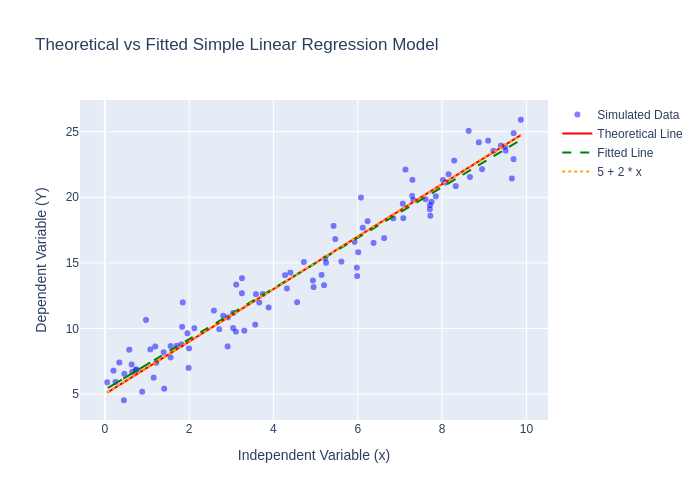

Fitted Intercept: 5.322644236320123
Fitted Slope: 1.931034015931547


In [4]:
# combined code from questions 1 and 2
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from scipy import stats
import statsmodels.formula.api as smf  # for fitting a regression model
import plotly.express as px

# Step 1: Define theoretical parameters for the SLR model
np.random.seed(42)  # Ensure reproducibility
n = 100  # Number of data points
beta_0 = 5  # Intercept (theoretical)
beta_1 = 2  # Slope (theoretical)
sigma = 1.5  # Standard deviation of the error term

# Step 2: Generate independent variable x using a uniform distribution
x = np.random.uniform(0, 10, n)

# Step 3: Calculate the predicted values (mean of the normal distribution)
y_pred = beta_0 + beta_1 * x  # Theoretical linear relationship

# Step 4: Generate errors (noise) from a normal distribution using scipy.stats
errors = stats.norm.rvs(loc=0, scale=sigma, size=n)  # loc is mean, scale is std dev

# Step 5: Calculate the dependent variable Y as the sum of predicted values and errors
Y = y_pred + errors  # Simulated data including noise

# Combine simulated x and Y into a pandas DataFrame
df = pd.DataFrame({'x': x, 'Y': Y})

# Step 6: Fit the Simple Linear Regression (SLR) model using the simulated data
model_data_specification = smf.ols("Y ~ x", data=df)  # Specify model
fitted_model = model_data_specification.fit()  # Fit the model

# Step 7: Create a Plotly figure to plot both lines
fig = go.Figure()

# Add scatter plot for the simulated data points
fig.add_trace(go.Scatter(x=x, y=Y, mode='markers', name='Simulated Data', marker=dict(color='blue', opacity=0.5)))

# Add the theoretical regression line (without noise)
fig.add_trace(go.Scatter(x=x, y=y_pred, mode='lines', name='Theoretical Line', line=dict(color='red', width=2)))

# Add the fitted regression line based on the noisy data
fitted_line = fitted_model.params['Intercept'] + fitted_model.params['x'] * x
fig.add_trace(go.Scatter(x=x, y=fitted_line, mode='lines', name='Fitted Line', line=dict(color='green', dash='dash')))

# Step 8: Add the custom theoretical line on the same plot
x_range = np.array([df['x'].min(), df['x'].max()])
y_line = beta_0 + beta_1 * x_range
fig.add_trace(go.Scatter(x=x_range, y=y_line, mode='lines',
                         name=str(beta_0)+' + '+str(beta_1)+' * x', 
                         line=dict(dash='dot', color='orange')))

# Update layout
fig.update_layout(title='Theoretical vs Fitted Simple Linear Regression Model',
                  xaxis_title='Independent Variable (x)',
                  yaxis_title='Dependent Variable (Y)',
                  showlegend=True)

# Show the plot
fig.show(renderer='png')

# Step 9: Print the fitted parameters (optional, for clarity)
print(f"Fitted Intercept: {fitted_model.params['Intercept']}")
print(f"Fitted Slope: {fitted_model.params['x']}")


The difference between the two lines is that the red line is showing theoretical, and green line is fitted. The difference between theoretical and fitted is as follows: Theoretical lines do not account for error, they represent the relationship of the data in a 'perfect world'. Fitted lines are a more accurate representation of the relatiship of the x and y in the real world. They take into sampling noise (error terms).

# Question 4


The fitted_model.fittedvalues are derived on the basis of fitted_model.summary().tables[1], they are estimated values of y, found by using the predicted coeffecients taken from fitted_model.summary().tables[1].
So basically: The estimated coefficients from `fitted_model.params`, which are obtained from `fitted_model.summary().tables[1]`, are used to generate the predicted \( y \)-values, which are listed in `fitted_model.fittedvalues`. The model equation \( \hat{y}_i = \hat{\beta_0} + \hat{\beta_1} x_i \) uses these coefficients.



Chat GPT's summary of the interaction:

### 1. **Theoretical Simple Linear Regression Model**:
We started by discussing the **Simple Linear Regression (SLR) model** formula:
\[
y_i = \beta_0 + \beta_1 x_i + \varepsilon_i
\]
Where:
- \( y_i \) is the dependent variable.
- \( x_i \) is the independent variable.
- \( \beta_0 \) is the intercept.
- \( \beta_1 \) is the slope (coefficient).
- \( \varepsilon_i \) is the error term, assumed to be normally distributed.

This model approximates the relationship between \( x \) and \( y \), where the true value of \( y \) is not directly given by the equation but is predicted based on the values of \( x \) and the model coefficients.

### 2. **Understanding `fitted_model.fittedvalues`**:
- **`fitted_model.fittedvalues`** contains the **predicted values** of \( y \), denoted as \( \hat{y}_i \), which are derived by applying the estimated coefficients (intercept and slope) to the observed \( x_i \)-values in the dataset.
- The predicted \( y \)-values are calculated using the formula:
  \[
  \hat{y}_i = \hat{\beta_0} + \hat{\beta_1} x_i
  \]
  Where **\( \hat{\beta_0} \)** and **\( \hat{\beta_1} \)** are the estimated coefficients, available from **`fitted_model.params`**.

### 3. **Role of `fitted_model.summary().tables[1]`**:
- **`fitted_model.summary().tables[1]`** provides the **estimated coefficients** (intercept and slope) of the regression model.
- These coefficients are extracted and used to calculate the predicted values of \( y \) for each observation in the dataset (i.e., the **fitted values**).

### 4. **Key Python Functions**:
- **`fitted_model.summary()`**: Provides a detailed summary of the regression model.
- **`fitted_model.params`**: Contains the estimated coefficients (intercept and slope).
- **`fitted_model.fittedvalues`**: Holds the predicted values of \( y \), derived by applying the estimated coefficients to the observed \( x \)-values.

### 5. **Visualization**:
- We also discussed how to visualize the fitted model's regression line alongside the observed data. **Plotly** and **Matplotlib** can be used to create plots of the data points and the regression line, which are calculated using the theoretical model and the fitted model.
  
### 6. **Clarifications**:
- **`fitted_model.fittedvalues`** are not directly derived from the summary table. They are **predictions** based on the estimated coefficients, which come from **`fitted_model.params`**, and the observed values of \( x \).
- The fitted values represent how the model predicts \( y \) based on the linear relationship defined by the estimated coefficients.

This summary covers the main concepts of how fitted values are derived from the theoretical and fitted model, along with the tools used in Python to work with these models.

# Week 2 Hw

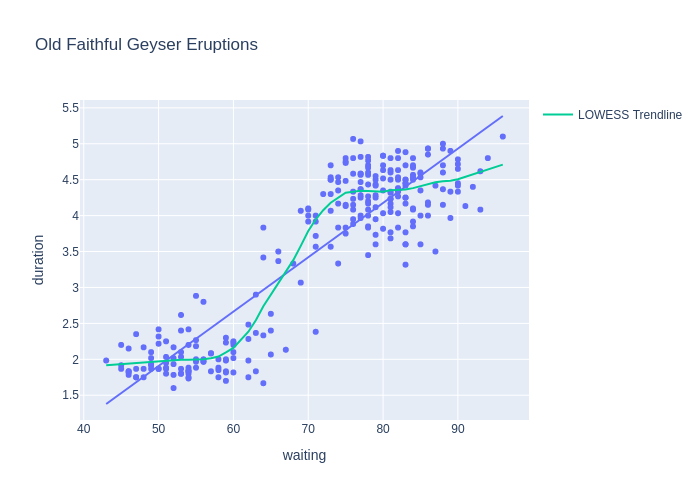

In [16]:
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm
import pandas as pd  

# The "Classic" Old Faithful Geyser dataset: ask a ChatBot for more details if desired
old_faithful = sns.load_dataset('geyser')

# Create a scatter plot with a Simple Linear Regression trendline
fig = px.scatter(old_faithful, x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions", 
                 trendline='ols')#'lowess'

# Add a smoothed LOWESS Trendline to the scatter plot
lowess = sm.nonparametric.lowess  # Adjust 'frac' to change "smoothness bandwidth"
smoothed = lowess(old_faithful['duration'], old_faithful['waiting'], frac=0.25)  
smoothed_df = pd.DataFrame(smoothed, columns=['waiting', 'smoothed_duration'])
fig.add_scatter(x=smoothed_df['waiting'], y=smoothed_df['smoothed_duration'], 
                mode='lines', name='LOWESS Trendline')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS


# Question 8


In [17]:
# Hypothesis testing using statsmodels
import statsmodels.api as sm

# Prepare the data for statsmodels
X = old_faithful['waiting']  # Independent variable (waiting time)
y = old_faithful['duration']  # Dependent variable (eruption duration)

# Add a constant to the independent variable (for the intercept term in the model)
X_with_intercept = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X_with_intercept).fit()

# Print the regression summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Fri, 08 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        02:51:26   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8740      0.160    -11.702      0.0

In [2]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Fri, 08 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        02:33:24   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$H_0$ - There is no association between wait time between eruptions and duration of eruption. There is no evidence of a linear relationship between the two variables (slope is zero). This means $\beta_1$ will be zero.

The p-value is 0.000, denoted by $P>|t|$. Which will be used to determine if there is evidence to reject $H_0$. "We reject the null hypothesis with a p-value of 0.000, meaning we have very strong evidence against the null hypothesis" If we are rejecting the null hypothesis, we concluded that the statement that $\beta_1$ will be zero is false, meaning that $\beta_1$ is not zero, and there is a relationship between the two variables. 

# Question 9


                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019
62


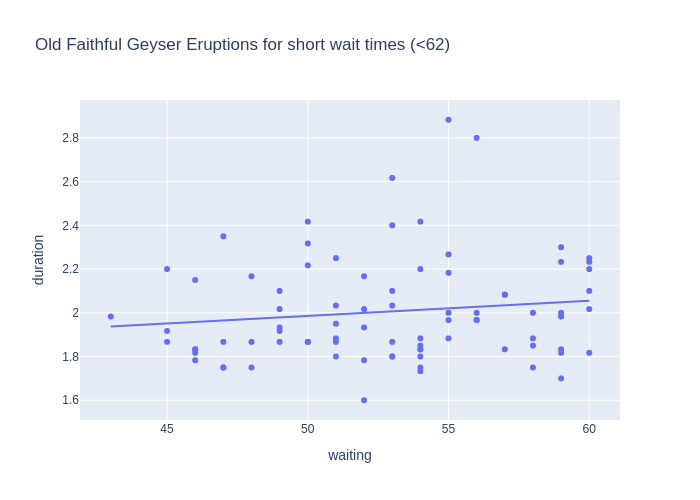

64


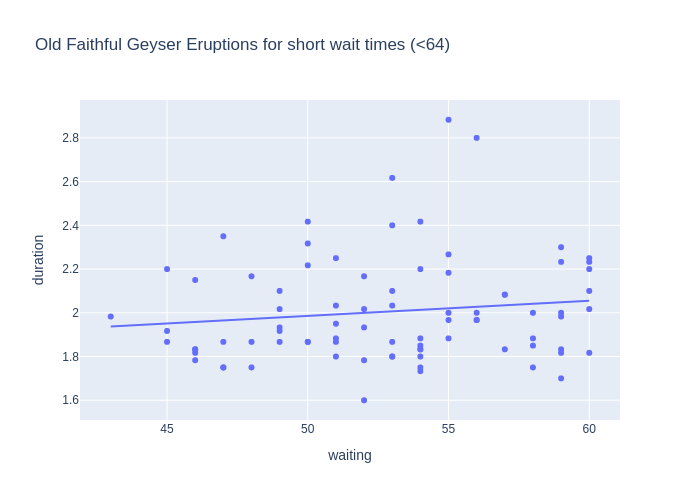

66


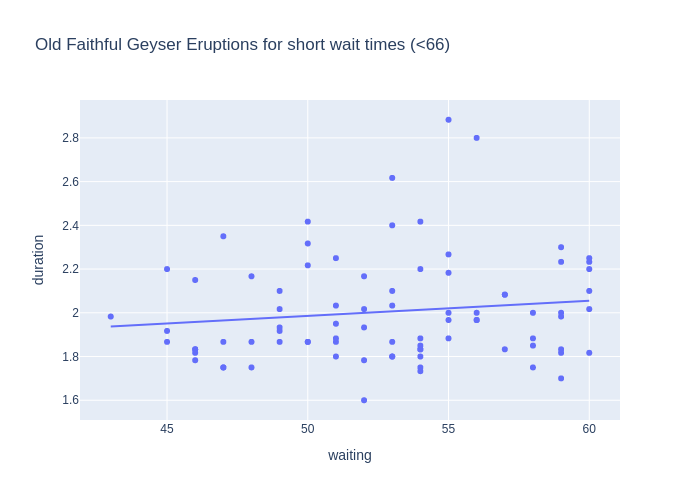

In [18]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 62 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig1 = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig2 = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(64)+")", 
                 trendline='ols')
fig3 = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(66)+")", 
                 trendline='ols')
print("62")
fig1.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS
print("64")
fig2.show(renderer="png")
print("66")
fig3.show(renderer="png")


For 62: 
Null Hypothesis (H₀): There is no linear relationship between the wait time and the duration of the eruption when the wait time is less than 62 minutes.
Alternative Hypotheis: There is some linear relationship between the wait time and duration of the eruption when the wait time is less than 62 mins.
For 64: 
Null Hypothesis (H₀): There is no linear relationship between the wait time and the duration of the eruption when the wait time is less than 64 minutes.
Alternative Hypotheis: There is some linear relationship between the wait time and duration of the eruption when the wait time is less than 64 mins.

For 66: 
Null Hypothesis (H₀): There is no linear relationship between the wait time and the duration of the eruption when the wait time is less than 66 minutes.
Alternative Hypotheis: There is some linear relationship between the wait time and duration of the eruption when the wait time is less than 66 mins.




In [19]:
import numpy as np
import scipy.stats as stats
import seaborn as sns

# Load the Old Faithful dataset
old_faithful = sns.load_dataset('geyser')

# Set the threshold value (61 minutes)
threshold1 = 62
threshold2 = 64
threshold3 = 66

# Perform a one-sample t-test on threshold1
t_stat, p_value = stats.ttest_1samp(old_faithful['waiting'], threshold1)
# Print the results
print("62")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


# Perform a one-sample t-test on threshold2
t_stat, p_value = stats.ttest_1samp(old_faithful['waiting'], threshold2)
# Print the results
print("64")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


# Perform a one-sample t-test on threshold3
t_stat, p_value = stats.ttest_1samp(old_faithful['waiting'], threshold3)
# Print the results
print("66")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


62
T-statistic: 10.793257523962307
P-value: 7.939281446934313e-23
64
T-statistic: 8.367004592955903
P-value: 3.1685743191793813e-15
66
T-statistic: 5.940751661949498
P-value: 8.683118423989768e-09


The results of the one sample tests show that all of the p-values are well below 0.001. Which means that all three $H_0$ can be rejected due to the insuffeciency of evidence supporting $H_0$, alternavitevly thought of as strong as having of evidence rejecting $H_0$.

# Question 10


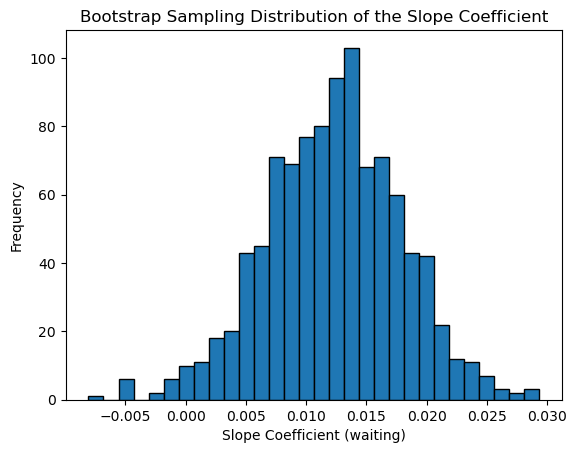

95% Confidence Interval for the Slope Coefficient: (0.0007678860850732223, 0.02318563977007672)


In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Load the Old Faithful dataset
old_faithful = sns.load_dataset('geyser')

# Define the long_wait subset (waiting time > 71 minutes in this example)
long_wait_limit = 71
long_wait = old_faithful[old_faithful['waiting'] > long_wait_limit]

# Number of bootstrap samples
n_bootstrap = 1000

# List to store the slope coefficients
bootstrapped_slope_coefficients = []

# Perform bootstrapping
for _ in range(n_bootstrap):
    # Sample with replacement from long_wait
    bootstrap_sample = long_wait.sample(n=len(long_wait), replace=True)
    
    # Fit the model to the bootstrap sample
    model = smf.ols('duration ~ waiting', data=bootstrap_sample).fit()
    
    # Store the slope coefficient
    bootstrapped_slope_coefficients.append(model.params['waiting'])

# Convert list to array for easier manipulation
bootstrapped_slope_coefficients = np.array(bootstrapped_slope_coefficients)

# Visualize the bootstrap sampling distribution of the slope coefficients
plt.hist(bootstrapped_slope_coefficients, bins=30, edgecolor='black')
plt.title('Bootstrap Sampling Distribution of the Slope Coefficient')
plt.xlabel('Slope Coefficient (waiting)')
plt.ylabel('Frequency')
plt.show()

# Calculate the 95% confidence interval from the bootstrap distribution
ci_lower, ci_upper = np.quantile(bootstrapped_slope_coefficients, [0.025, 0.975])
print(f"95% Confidence Interval for the Slope Coefficient: ({ci_lower}, {ci_upper})")


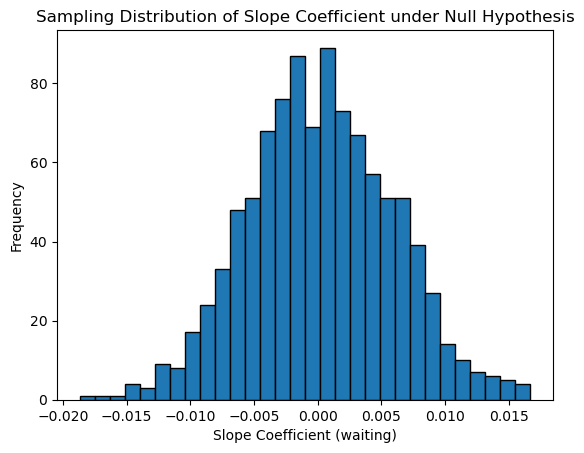

Simulated P-value under the null hypothesis: 0.035


In [7]:
import scipy.stats as stats

# Simulate data under the null hypothesis (slope = 0)
n_simulations = 1000  # Number of simulations
simulated_slope_coefficients = []

for _ in range(n_simulations):
    # Simulate the 'duration' values assuming no relationship with 'waiting'
    simulated_duration = 1.65 + 0 * long_wait['waiting'] + stats.norm(loc=0, scale=0.37).rvs(size=len(long_wait))
    
    # Create a simulated DataFrame
    simulated_data = pd.DataFrame({
        'waiting': long_wait['waiting'],
        'duration': simulated_duration
    })
    
    # Fit the model to the simulated data
    model = smf.ols('duration ~ waiting', data=simulated_data).fit()
    
    # Store the slope coefficient
    simulated_slope_coefficients.append(model.params['waiting'])

# Convert list to array for easier manipulation
simulated_slope_coefficients = np.array(simulated_slope_coefficients)

# Visualize the simulated sampling distribution of the slope coefficient under the null hypothesis
plt.hist(simulated_slope_coefficients, bins=30, edgecolor='black')
plt.title('Sampling Distribution of Slope Coefficient under Null Hypothesis')
plt.xlabel('Slope Coefficient (waiting)')
plt.ylabel('Frequency')
plt.show()

# Calculate the p-value based on the simulated slopes
actual_slope = smf.ols('duration ~ waiting', data=long_wait).fit().params['waiting']
simulated_p_value = (np.abs(simulated_slope_coefficients) >= np.abs(actual_slope)).mean()
print(f"Simulated P-value under the null hypothesis: {simulated_p_value}")


Yes, a slope of zero is within both these value ranges.

# Question 11

In [25]:
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd

# Assuming 'old_faithful' DataFrame is already loaded

# Set the threshold for wait times
short_wait_threshold = 68

# Create the indicator variable: 1 for short waits (< 68), 0 for long waits (> 68)
old_faithful['short_wait'] = (old_faithful['waiting'] < short_wait_threshold).astype(int)

# Fit the Simple Linear Regression model with the indicator variable
ols_model = smf.ols('duration ~ short_wait', data=old_faithful).fit()

# Print the summary of the model to check the coefficients and p-value
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:               duration   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1803.
Date:                Fri, 08 Nov 2024   Prob (F-statistic):          1.60e-121
Time:                        02:55:19   Log-Likelihood:                -144.19
No. Observations:                 272   AIC:                             292.4
Df Residuals:                     270   BIC:                             299.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2979      0.031    136.594      0.0

In [26]:
smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1803.
Date:                Fri, 08 Nov 2024   Prob (F-statistic):          1.60e-121
Time:                        02:56:36   Log-Likelihood:                -144.19
No. Observations:                 272   AIC:                             292.4
Df Residuals:                     270   BIC:                             299.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                         2.0943      0.041     50.752      0.000       2.013       2.176
C(kind, Treatment(reference="short"))[T.long]     2.2036      0.052     42.464      0.000       2.101       2.306
==============================================================================
Omnibus:                       24.187   Durbin-Watson:                   2.294
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.493
Skew:                           0.111   Prob(JB):                     1.11e-21
Kurtosis:                       5.909   Cond. No.                         3.06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

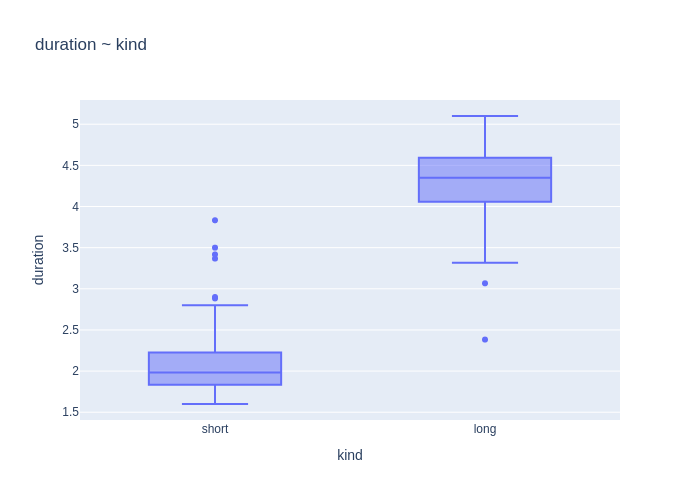

In [28]:
fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show(renderer="png")


So in total the big difference between the slr model specification using an indicator variable of the wait time length and the others (smf.ols('duration ~ waiting', data=old_faithful), smf.ols('duration ~ waiting', data=old_faithful[short_wait]),  smf.ols('duration ~ waiting', data=old_faithful[long_wait])) is that in the indicator variable, the wait time is treated as a categorial variable, not as a continous variable, like in the other model specifications. In smf.ols('duration ~ waiting', ...)), wating was treated as an variable that predicted but didnt differentiate between long and short times. While smf.ols('duration ~ C(kind, Treatment(reference="short"))', ...)), did differentiate between the two. In general the continous approach, by not using wating as an indicator variable is that a single slope is estimated, but by using the indicator variable, the categorial approach, there is going to be short and long, and the model will test if there is a difference between the two. 


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


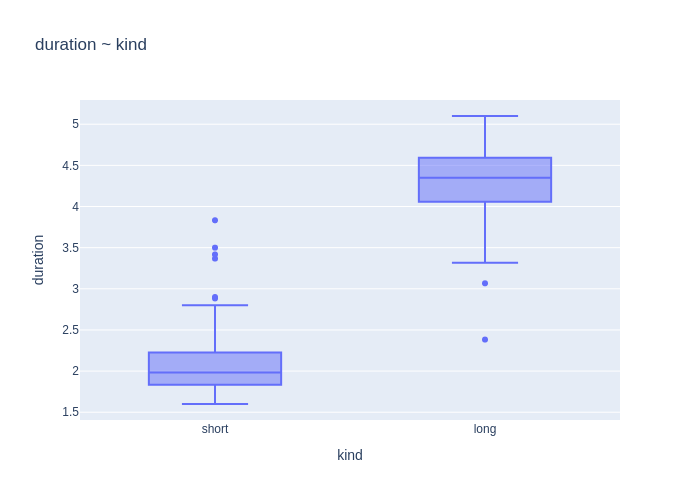

In [30]:
from IPython.display import display

display(smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary().tables[1])

fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS


In this case, the p value is also zero, again. So we can conclude that there is very strong evidence to reject the null hypotheis. And we can say that the p value being 0.000 provides us with strong evidence that we can reject the null hypothesis that there is no difference between the two groups. 

Summary of Sesssion 2:

We worked through a series of questions related to statistical analysis using the Old Faithful dataset, with a focus on **Simple Linear Regression (SLR)** models and **hypothesis testing**. The main topics we covered were:

1. **Null Hypothesis Testing**: You learned how to test the null hypothesis for various wait times (e.g., 62, 64, and 66 minutes) and understood the significance of p-values in rejecting the null hypothesis. For example, when the p-value was very small (e.g., 7.94e-23), this indicated strong evidence against the null hypothesis that there is no relationship between wait time and eruption duration.

2. **Bootstrapping and Simulation**: We explored the process of bootstrapping and running simulations under a null hypothesis to generate p-values and confidence intervals for slope coefficients in regression models. You also examined how to visualize the results using plots (e.g., histograms of bootstrapped slopes).

3. **Interpretation of Results**: We discussed how to interpret p-values and confidence intervals for regression models, including understanding the rejection of null hypotheses and the evidence it provides for relationships between variables.

4. **Interaction Term**: We briefly introduced the idea of interaction in regression models, explaining that an interaction term reveals whether the effect of one variable depends on the level of another. We noted how this would apply to your data and how it differs from simpler models without interactions.

5. **Indicator Variable Models**: The final question involved creating an indicator variable for classifying "short" and "long" wait times and comparing the model results with previous models. You used `smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful)` to create a regression model that included an indicator variable for wait time classification.

Your analysis ultimately focused on determining whether there was evidence against the null hypothesis of "no difference between groups" (short vs. long wait times) based on the results from your regression models and visualizations.

If you need any further clarifications or additional steps in this analysis, feel free to ask!